In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [83]:
data = pd.read_csv("gz2sample_final3.csv")
data.head(5)

,OBJ,RA,DEC,PETROR50_R,PETROR90_R,PETROMAG_U,PETROMAG_G,PETROMAG_R,PETROMAG_I,PETROMAG_Z,...,PETROMAGERR_MG,PETROMAGERR_MR,PETROMAGERR_MI,PETROMAGERR_MZ,PETROR50_R_KPC,color_new,Morphology,Uncertain,Elliptical,Spiral
0,154,170.805579,-1.182146,4.486662,10.670979,19.361341,17.737705,16.935238,16.445162,16.151276,...,0.016296,0.013468,0.014121,0.024163,4.196238,0.802467,0,1,0,0
1,27,170.945892,-1.108325,13.407897,26.012415,31.566551,37.952810,14.845700,35.954224,29.191177,...,0.016296,0.013468,0.014121,0.024163,4.196238,23.107110,0,1,0,0
2,35,171.990936,-1.214009,8.175695,15.858483,17.994175,16.808289,15.780492,15.409781,15.245371,...,0.016296,0.013468,0.014121,0.024163,4.196238,1.027797,0,1,0,0
3,101,177.631858,-1.105126,2.929065,8.661545,20.127234,18.129680,16.823240,16.327341,15.979728,...,0.016296,0.013468,0.014121,0.024163,4.196238,1.306440,1,0,1,0
4,94,182.925262,-1.092357,2.695631,7.912694,19.045778,17.276037,16.401808,15.985344,15.641546,...,0.016804,0.013804,0.014019,0.019940,3.973422,0.874229,1,0,1,0


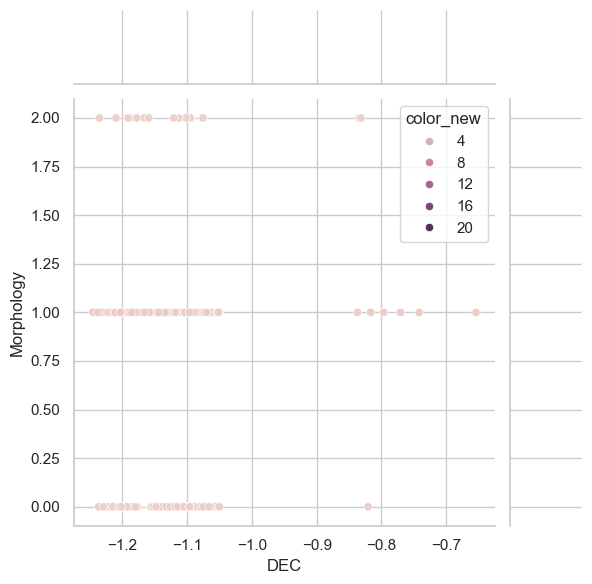

In [84]:
sns.jointplot(x="DEC", y="Morphology", data=data ,  hue="color_new")

In [85]:
data2 = pd.read_csv("metadata_200.csv")
data2.columns

Index(['OBJID', 'RA', 'DEC', 'NVOTE', 'P_EL', 'P_CW', 'P_ACW', 'P_EDGE',
       'P_DK', 'P_MG', 'P_CS', 'P_EL_DEBIASED', 'P_CS_DEBIASED', 'SPIRAL',
       'ELLIPTICAL', 'UNCERTAIN', 'image_file'],
      dtype='object')

In [86]:
data2 = data2.rename(columns={
    "RA": "Right Ascension",
    "DEC": "Declination",
    "P_EL": "Probability Elliptical",
    "P_CW": "Probability Clockwise Spiral",
    "P_ACW": "Probability Anti-Clockwise Spiral",
    "P_EDGE": "Probability Edge-on",
    "P_DK": "Don't Know",
    "P_MG": "Merger",
    "P_CS": "Cigar Shaped",
    "P_EL_DEBIASED": "Probability Elliptical after Debiased",
    "P_CS_DEBIASED": "Probability Cigar-Shaped after Debiased"
})


In [87]:
data2.columns

Index(['OBJID', 'Right Ascension', 'Declination', 'NVOTE',
       'Probability Elliptical', 'Probability Clockwise Spiral',
       'Probability Anti-Clockwise Spiral', 'Probability Edge-on',
       'Don't Know', 'Merger', 'Cigar Shaped',
       'Probability Elliptical after Debiased',
       'Probability Cigar-Shaped after Debiased', 'SPIRAL', 'ELLIPTICAL',
       'UNCERTAIN', 'image_file'],
      dtype='object')

In [88]:
data2.head()

,OBJID,Right Ascension,Declination,NVOTE,Probability Elliptical,Probability Clockwise Spiral,Probability Anti-Clockwise Spiral,Probability Edge-on,Don't Know,Merger,Cigar Shaped,Probability Elliptical after Debiased,Probability Cigar-Shaped after Debiased,SPIRAL,ELLIPTICAL,UNCERTAIN,image_file
0,587727178986356823,00:00:00.41,-10:22:25.7,59,0.610,0.034,0.000,0.153,0.153,0.051,0.186,0.610,0.186,0,0,1,0001.jpg
1,587727227300741210,00:00:00.74,-09:13:20.2,18,0.611,0.000,0.167,0.222,0.000,0.000,0.389,0.203,0.797,1,0,0,0002.jpg
2,587727225153257596,00:00:01.03,-10:56:48.0,68,0.735,0.029,0.000,0.147,0.074,0.015,0.176,0.432,0.428,0,0,1,0003.jpg
3,587730774962536596,00:00:01.38,+15:30:35.3,52,0.885,0.019,0.000,0.058,0.019,0.019,0.077,0.885,0.077,0,1,0,0004.jpg
4,587731186203885750,00:00:01.55,-00:05:33.3,59,0.712,0.000,0.000,0.220,0.068,0.000,0.220,0.640,0.290,0,0,1,0005.jpg


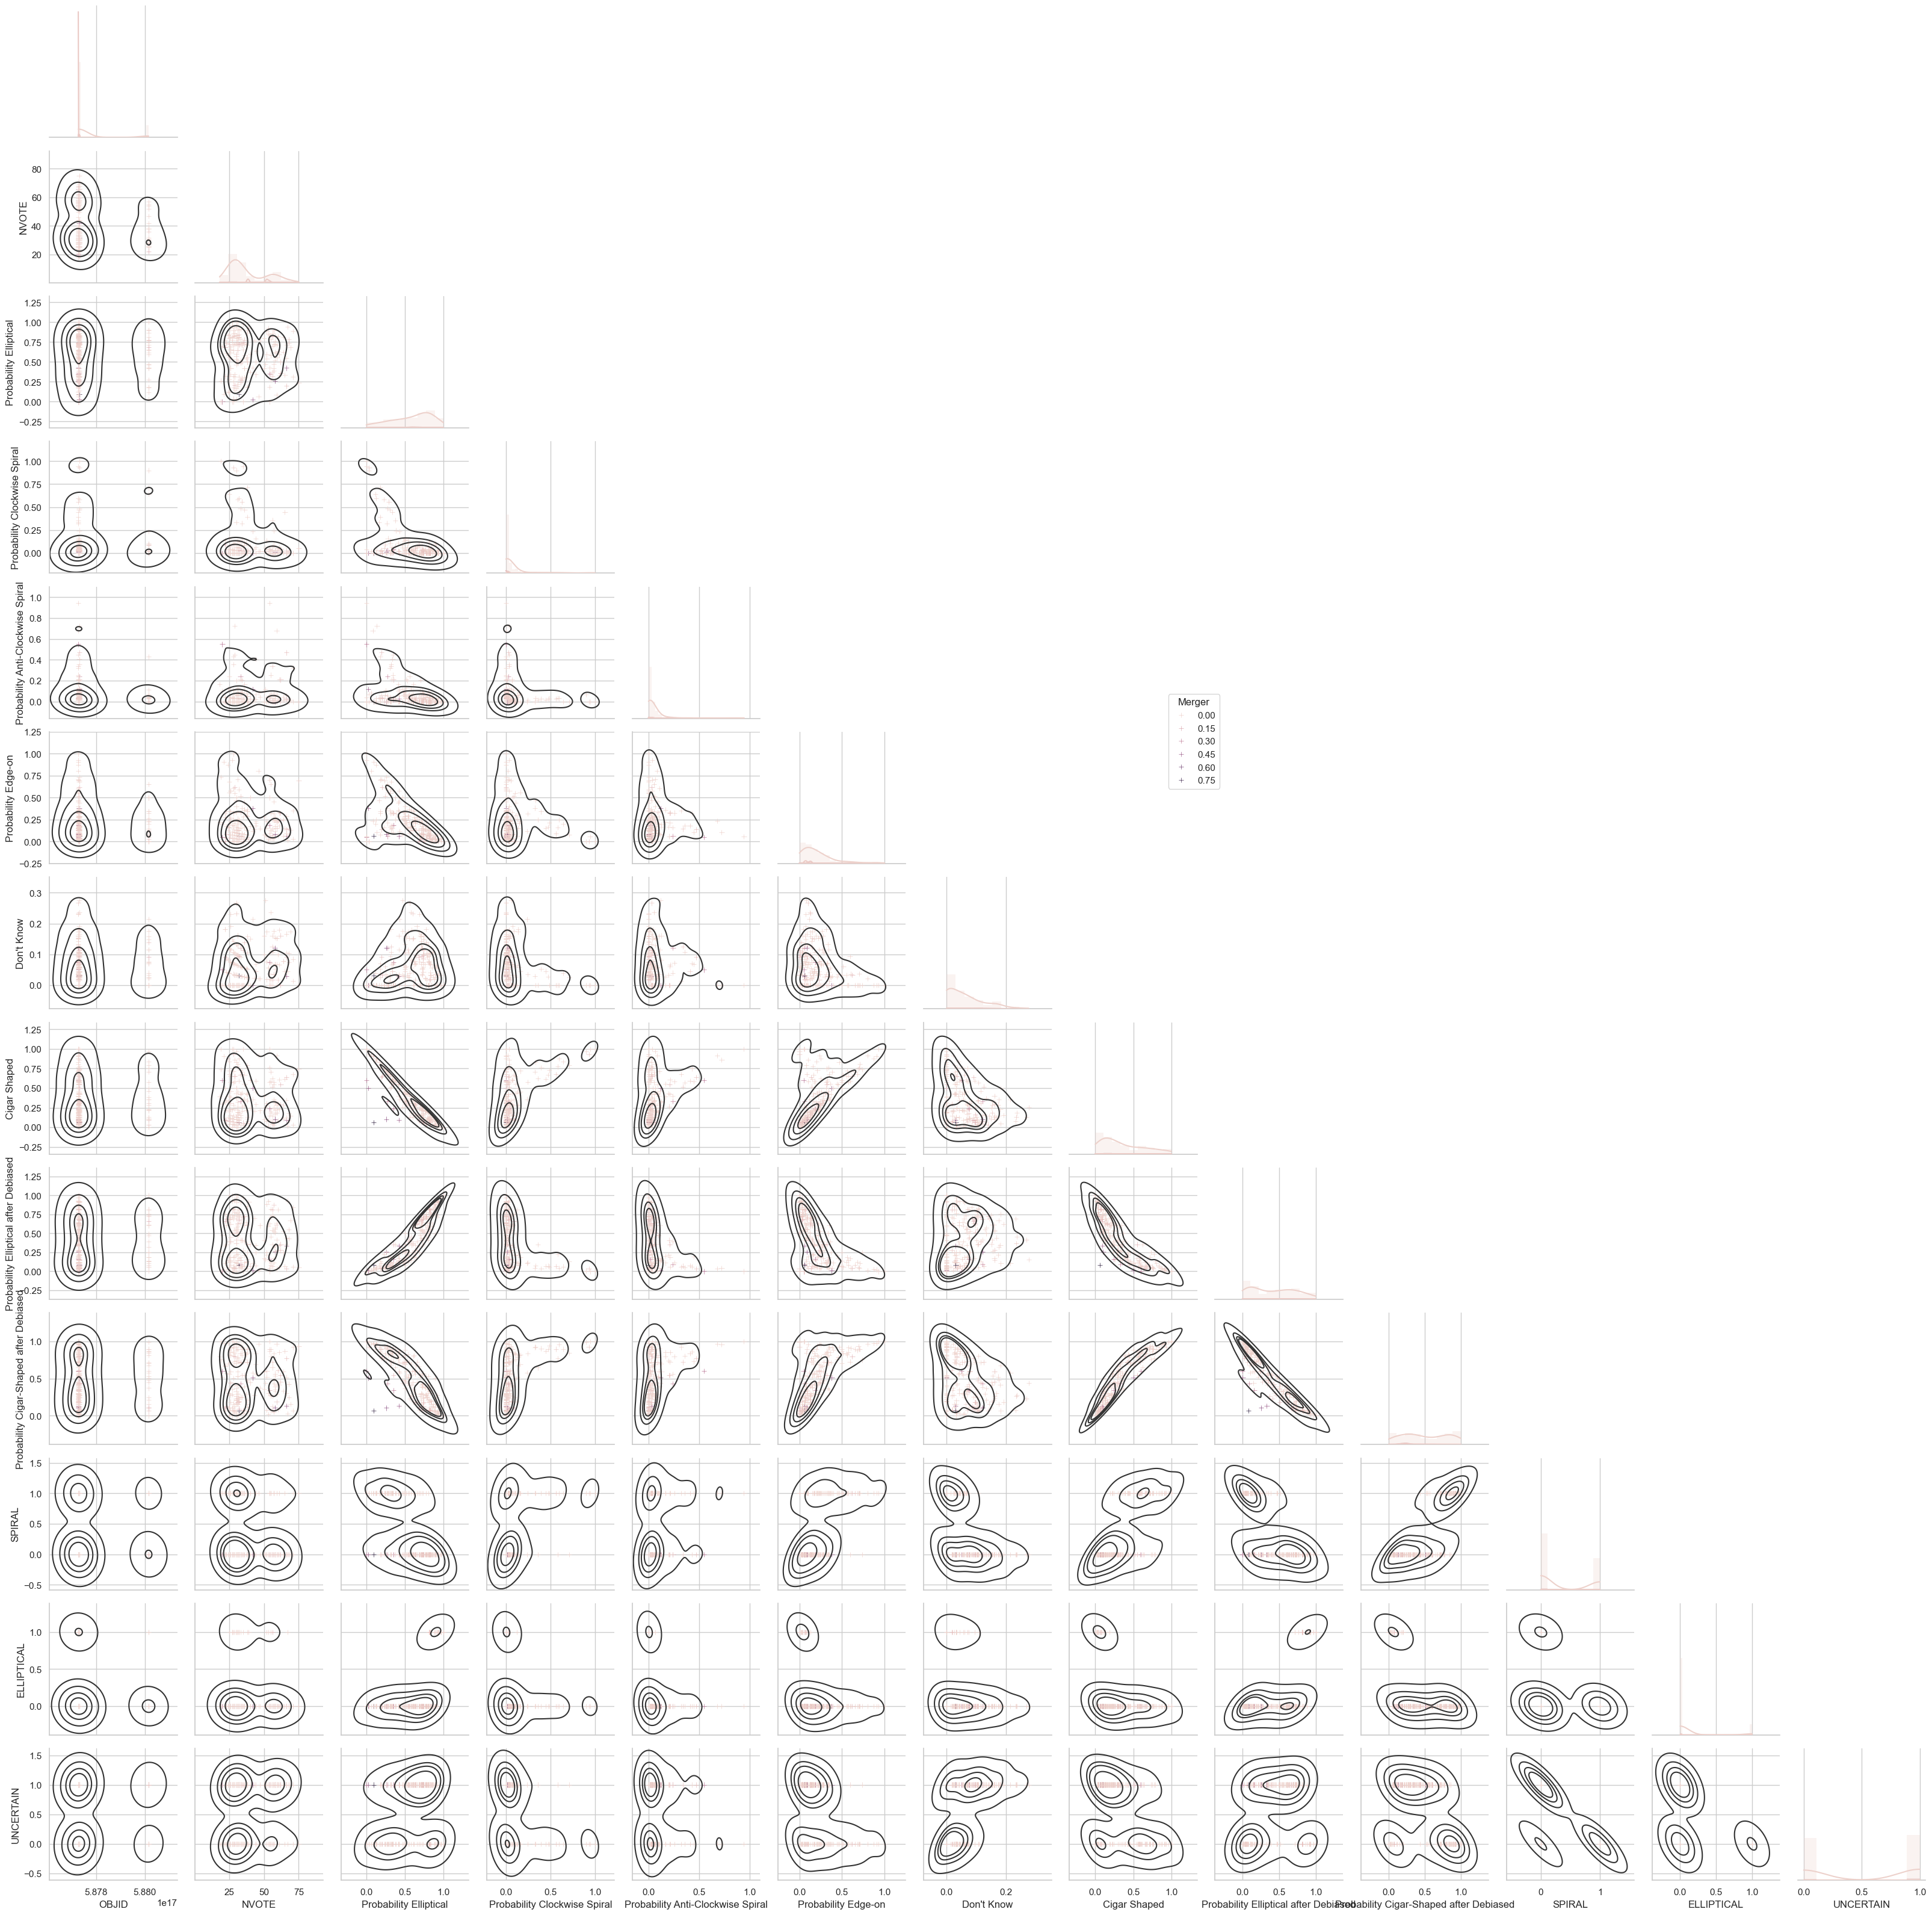

In [89]:
g = sns.PairGrid(data2, hue="Merger", corner=True)
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sns.scatterplot, marker="+")
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))

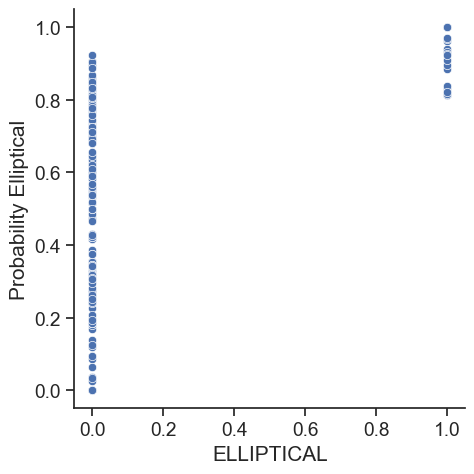

In [31]:
sns.relplot(data=data2, x="ELLIPTICAL", y="Probability Elliptical")

(array([184.,   9.,   0.,   1.,   2.,   2.,   1.,   0.,   0.,   1.]),
 array([0.    , 0.0812, 0.1624, 0.2436, 0.3248, 0.406 , 0.4872, 0.5684,
        0.6496, 0.7308, 0.812 ]),
 <BarContainer object of 10 artists>)

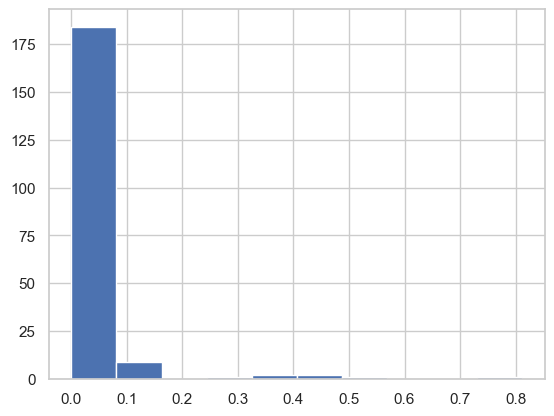

In [37]:
plt.hist(data2["Merger"])

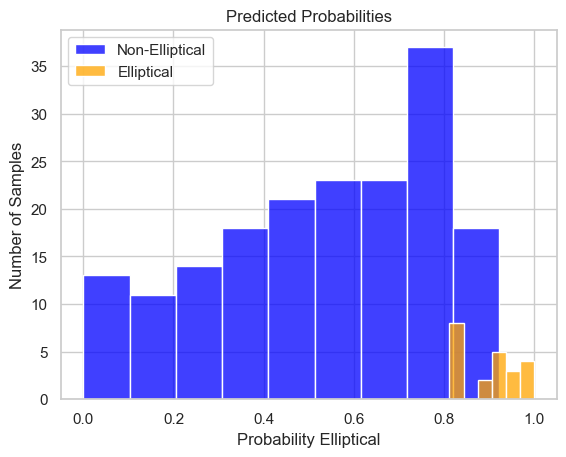

In [ ]:
sns.histplot(data=data2[data2['ELLIPTICAL'] < 0.5], 
             x='Probability Elliptical', 
             color='blue', 
             label='Non-Elliptical')

sns.histplot(data=data2[data2['ELLIPTICAL'] >= 0.5], 
             x='Probability Elliptical', 
             color='orange', 
             label='Elliptical')

plt.title('Predicted Probabilities')
plt.xlabel('Probability Elliptical')
plt.ylabel('Number of Samples')

plt.legend()
plt.show()

#most of the galaxies in this data are elliptical 

In [90]:
data2.head()

,OBJID,Right Ascension,Declination,NVOTE,Probability Elliptical,Probability Clockwise Spiral,Probability Anti-Clockwise Spiral,Probability Edge-on,Don't Know,Merger,Cigar Shaped,Probability Elliptical after Debiased,Probability Cigar-Shaped after Debiased,SPIRAL,ELLIPTICAL,UNCERTAIN,image_file
0,587727178986356823,00:00:00.41,-10:22:25.7,59,0.610,0.034,0.000,0.153,0.153,0.051,0.186,0.610,0.186,0,0,1,0001.jpg
1,587727227300741210,00:00:00.74,-09:13:20.2,18,0.611,0.000,0.167,0.222,0.000,0.000,0.389,0.203,0.797,1,0,0,0002.jpg
2,587727225153257596,00:00:01.03,-10:56:48.0,68,0.735,0.029,0.000,0.147,0.074,0.015,0.176,0.432,0.428,0,0,1,0003.jpg
3,587730774962536596,00:00:01.38,+15:30:35.3,52,0.885,0.019,0.000,0.058,0.019,0.019,0.077,0.885,0.077,0,1,0,0004.jpg
4,587731186203885750,00:00:01.55,-00:05:33.3,59,0.712,0.000,0.000,0.220,0.068,0.000,0.220,0.640,0.290,0,0,1,0005.jpg


In [91]:
data2.columns

Index(['OBJID', 'Right Ascension', 'Declination', 'NVOTE',
       'Probability Elliptical', 'Probability Clockwise Spiral',
       'Probability Anti-Clockwise Spiral', 'Probability Edge-on',
       'Don't Know', 'Merger', 'Cigar Shaped',
       'Probability Elliptical after Debiased',
       'Probability Cigar-Shaped after Debiased', 'SPIRAL', 'ELLIPTICAL',
       'UNCERTAIN', 'image_file'],
      dtype='object')

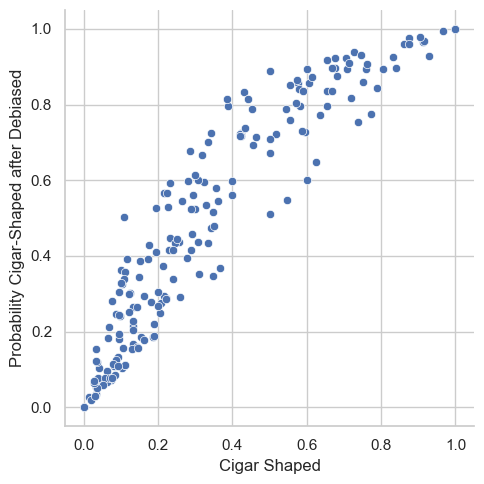

In [ ]:
sns.relplot(
    data=data2,
    x="Cigar Shaped", y="Probability Cigar-Shaped after Debiased"
)
# people recognised the ellipticals corrctly. (it was nat that hard!)

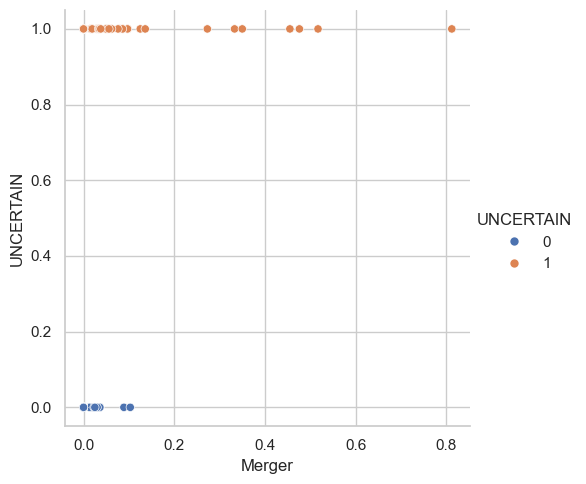

In [46]:
sns.relplot(
    data=data2,
    x="Merger", y="UNCERTAIN" , hue="UNCERTAIN"
)

In [92]:
data3 = pd.read_csv("gz2sample_final3.csv")
data3.head()

,OBJ,RA,DEC,PETROR50_R,PETROR90_R,PETROMAG_U,PETROMAG_G,PETROMAG_R,PETROMAG_I,PETROMAG_Z,...,PETROMAGERR_MG,PETROMAGERR_MR,PETROMAGERR_MI,PETROMAGERR_MZ,PETROR50_R_KPC,color_new,Morphology,Uncertain,Elliptical,Spiral
0,154,170.805579,-1.182146,4.486662,10.670979,19.361341,17.737705,16.935238,16.445162,16.151276,...,0.016296,0.013468,0.014121,0.024163,4.196238,0.802467,0,1,0,0
1,27,170.945892,-1.108325,13.407897,26.012415,31.566551,37.952810,14.845700,35.954224,29.191177,...,0.016296,0.013468,0.014121,0.024163,4.196238,23.107110,0,1,0,0
2,35,171.990936,-1.214009,8.175695,15.858483,17.994175,16.808289,15.780492,15.409781,15.245371,...,0.016296,0.013468,0.014121,0.024163,4.196238,1.027797,0,1,0,0
3,101,177.631858,-1.105126,2.929065,8.661545,20.127234,18.129680,16.823240,16.327341,15.979728,...,0.016296,0.013468,0.014121,0.024163,4.196238,1.306440,1,0,1,0
4,94,182.925262,-1.092357,2.695631,7.912694,19.045778,17.276037,16.401808,15.985344,15.641546,...,0.016804,0.013804,0.014019,0.019940,3.973422,0.874229,1,0,1,0


In [93]:
data3.columns

Index(['OBJ', 'RA', 'DEC', 'PETROR50_R', 'PETROR90_R', 'PETROMAG_U',
       'PETROMAG_G', 'PETROMAG_R', 'PETROMAG_I', 'PETROMAG_Z', 'PETROMAGERR_U',
       'PETROMAGERR_G', 'PETROMAGERR_R', 'PETROMAGERR_I', 'PETROMAGERR_Z',
       'PSFMAG_R', 'FIBERMAG_R', 'DEVMAG_R', 'DEVMAGERR_R', 'EXPMAG_R',
       'EXPMAGERR_R', 'FRACDEV_R', 'MU50_R', 'EXTINCTION_U', 'EXTINCTION_G',
       'EXTINCTION_R', 'EXTINCTION_I', 'EXTINCTION_Z', 'CMODELMAG_R',
       'CMODELMAGERR_R', 'REDSHIFT', 'REDSHIFTERR', 'PETROMAG_MU',
       'PETROMAG_MG', 'PETROMAG_MR', 'PETROMAG_MI', 'PETROMAG_MZ',
       'PETROMAGERR_MU', 'PETROMAGERR_MG', 'PETROMAGERR_MR', 'PETROMAGERR_MI',
       'PETROMAGERR_MZ', 'PETROR50_R_KPC', 'color_new', 'Morphology',
       'Uncertain', 'Elliptical', 'Spiral'],
      dtype='object')

In [ ]:
data3 = data3.rename(columns={

    "OBJ": "ID",  
    "RA": "Right Ascension",   
    "DEC": "Declination", 

    "PETROR50_R": "Radius50",  
    "PETROR90_R": "Radius90",   

    "PETROMAG_U": "Brightness_U",  #fara banafsh
    "PETROMAG_G": "Brightness_G",  # green light
    "PETROMAG_R": "Brightness_R",  # red light
    "PETROMAG_I": "Brightness_I",  # close to Infrared
    "PETROMAG_Z": "Brightness_Z",  # Infrared light

    "PSFMAG_R": "Point_Brightness_R", 
    "FIBERMAG_R": "Fiber_Brightness_R", 
    "DEVMAG_R": "Dev_Model_Brightness_R",  
    "DEVMAGERR_R": "Err_Dev_Model_R",  
    "EXPMAG_R": "Exp_Model_Brightness_R",  
    "EXPMAGERR_R": "Err_Exp_Model_R",  

    "FRACDEV_R": "Frac_Dev",      
    "MU50_R": "Surface_Brightness", # % of brightness in 50 epsilon

    "EXTINCTION_U": "Dust_U",  # weaking light because of the dust
    "EXTINCTION_G": "Dust_G",
    "EXTINCTION_R": "Dust_R",
    "EXTINCTION_I": "Dust_I",
    "EXTINCTION_Z": "Dust_Z",  

    "REDSHIFT": "Redshift",        # transform to RED (distance)
    "REDSHIFTERR": "Err_Redshift", # error transforming to red

    "PETROMAG_MU": "Corrected_U",  
    "PETROMAG_MG": "Corrected_G",
    "PETROMAG_MR": "Corrected_R",
    "PETROMAG_MI": "Corrected_I",
    "PETROMAG_MZ": "Corrected_Z",

    "PETROMAGERR_MU": "Err_Corrected_U",
    "PETROMAGERR_MG": "Err_Corrected_G",
    "PETROMAGERR_MR": "Err_Corrected_R",
    "PETROMAGERR_MI": "Err_Corrected_I",
    "PETROMAGERR_MZ": "Err_Corrected_Z",

    "color_new": "Color",           
    "Morphology": "Morphology",
    "Uncertain": "Uncertain",    
    "Elliptical": "Elliptical",
    "Spiral": "Spiral"          
})


In [95]:
data3.head()

,ID,Right Ascension,Declination,Radius50,Radius90,Brightness_U,Brightness_G,Brightness_R,Brightness_I,Brightness_Z,...,Err_Corrected_G,Err_Corrected_R,Err_Corrected_I,Err_Corrected_Z,PETROR50_R_KPC,Color,Morphology,Uncertain,Elliptical,Spiral
0,154,170.805579,-1.182146,4.486662,10.670979,19.361341,17.737705,16.935238,16.445162,16.151276,...,0.016296,0.013468,0.014121,0.024163,4.196238,0.802467,0,1,0,0
1,27,170.945892,-1.108325,13.407897,26.012415,31.566551,37.952810,14.845700,35.954224,29.191177,...,0.016296,0.013468,0.014121,0.024163,4.196238,23.107110,0,1,0,0
2,35,171.990936,-1.214009,8.175695,15.858483,17.994175,16.808289,15.780492,15.409781,15.245371,...,0.016296,0.013468,0.014121,0.024163,4.196238,1.027797,0,1,0,0
3,101,177.631858,-1.105126,2.929065,8.661545,20.127234,18.129680,16.823240,16.327341,15.979728,...,0.016296,0.013468,0.014121,0.024163,4.196238,1.306440,1,0,1,0
4,94,182.925262,-1.092357,2.695631,7.912694,19.045778,17.276037,16.401808,15.985344,15.641546,...,0.016804,0.013804,0.014019,0.019940,3.973422,0.874229,1,0,1,0


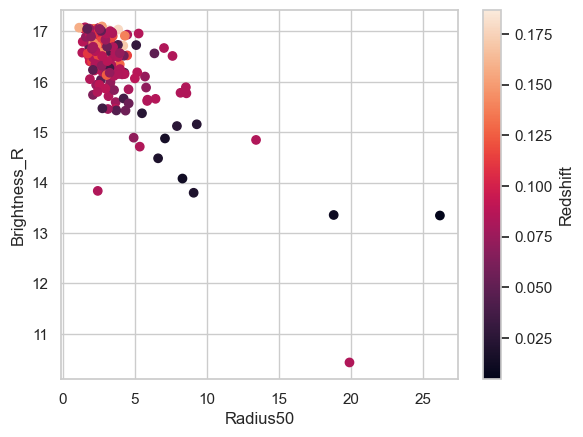

In [ ]:
plt.scatter(data3['Radius50'], data3['Brightness_R'], c=data3['Redshift'])
plt.xlabel("Radius50")
plt.ylabel("Brightness_R")   # we chose R cause we wanna check the redshift
plt.colorbar(label="Redshift")
plt.show()

#brightness_R is appearence--------lower (Brightness_R), more brightness
#radious50 is the galaxy itself
#the lower the brightness is, the more resdhift it gets.

#brightness and size and color and shape .... Direct impact.
#dark reds is the farthests

In [123]:
%matplotlib qt

ax = plt.axes(projection = "3d")
ax.scatter3D(data3["Radius50"] , data3["Brightness_R"] , data3["Redshift"] , c=data3["Redshift"])

# dark red is the farthest
#all the galaxies are gathered into a compact mass.

uncertain=0
elliptical=1
spiral=2

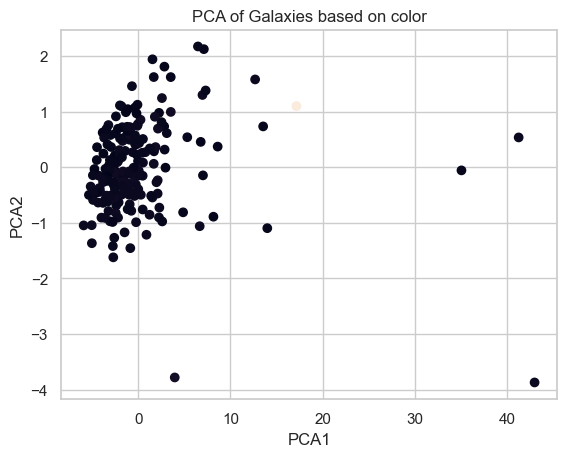

In [ ]:
from sklearn.decomposition import PCA
%matplotlib inline

#90 درصد نور کهکشان توی اون دایره جمع شده
# Frac_Dev....is for ellipticals
# Surface_Brightness ... in elliptical is more

features = ['Radius90', 'Brightness_R', 'Surface_Brightness', 'Frac_Dev']
x = data3[features]

pca = PCA(n_components=2)
res_pca = pca.fit_transform(x)

plt.scatter(res_pca[:,0] , res_pca[:,1], c=data3["Color"])
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("PCA of Galaxies based on color")
plt.show()

i found  Galactic cluster where almost all the galaxies in are:
.ELLIPTICAL
.RED
they are on the famous (Red Sequence) line.

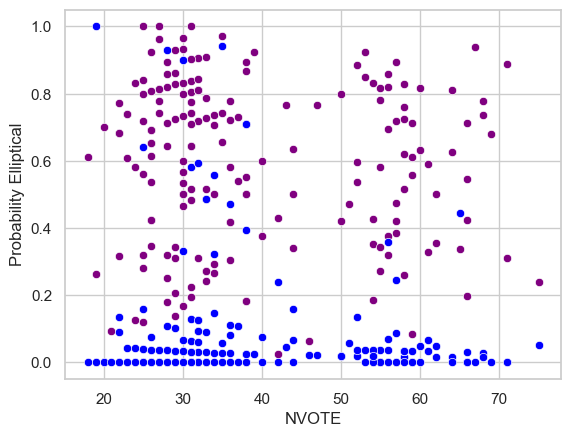

In [ ]:
import seaborn as sns
sns.scatterplot(x='NVOTE', y='Probability Elliptical', data=data2, c="purple")
sns.scatterplot(x='NVOTE', y='Probability Clockwise Spiral', data=data2 , c="blue")
plt.show()

#purple: elliptical
#blue: non_elliptical
#people mostly recognised elliptical galaxies

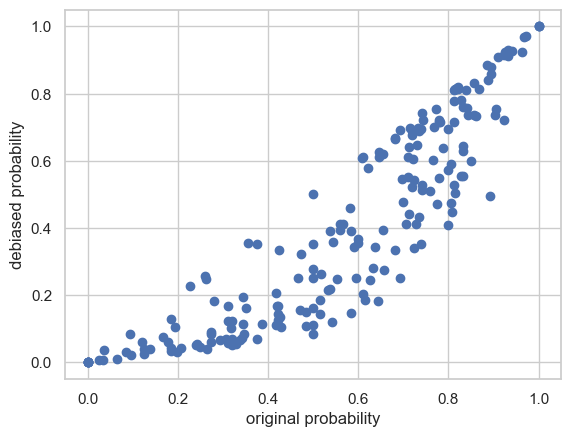

In [ ]:
plt.scatter(data2['Probability Elliptical'], data2['Probability Elliptical after Debiased'])
plt.xlabel("original probability")
plt.ylabel("debiased probability")
plt.show()

# the orginal probability did not have that much biase

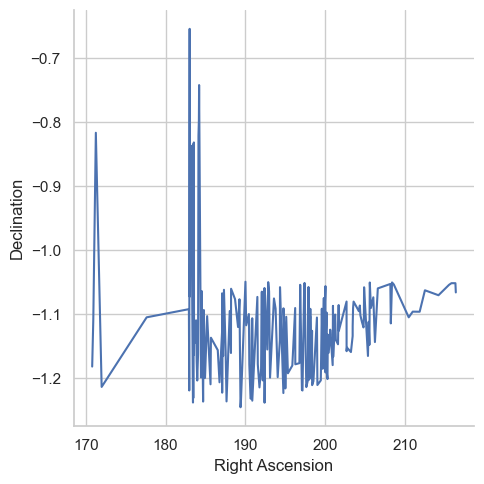

In [ ]:
sns.relplot(data=data3, x="Right Ascension", y="Declination", kind="line")

# The distance between galaxies

In [126]:
data3.head()

,ID,Right Ascension,Declination,Radius50,Radius90,Brightness_U,Brightness_G,Brightness_R,Brightness_I,Brightness_Z,...,Err_Corrected_G,Err_Corrected_R,Err_Corrected_I,Err_Corrected_Z,PETROR50_R_KPC,Color,Morphology,Uncertain,Elliptical,Spiral
0,154,170.805579,-1.182146,4.486662,10.670979,19.361341,17.737705,16.935238,16.445162,16.151276,...,0.016296,0.013468,0.014121,0.024163,4.196238,0.802467,0,1,0,0
1,27,170.945892,-1.108325,13.407897,26.012415,31.566551,37.952810,14.845700,35.954224,29.191177,...,0.016296,0.013468,0.014121,0.024163,4.196238,23.107110,0,1,0,0
2,35,171.990936,-1.214009,8.175695,15.858483,17.994175,16.808289,15.780492,15.409781,15.245371,...,0.016296,0.013468,0.014121,0.024163,4.196238,1.027797,0,1,0,0
3,101,177.631858,-1.105126,2.929065,8.661545,20.127234,18.129680,16.823240,16.327341,15.979728,...,0.016296,0.013468,0.014121,0.024163,4.196238,1.306440,1,0,1,0
4,94,182.925262,-1.092357,2.695631,7.912694,19.045778,17.276037,16.401808,15.985344,15.641546,...,0.016804,0.013804,0.014019,0.019940,3.973422,0.874229,1,0,1,0
